In [0]:
from fastai.vision import *

In [0]:
!mkdir data

In [0]:
!mkdir data/bears

In [0]:
folder = 'black'
file = 'blk.txt'


In [0]:
folder = 'teddys'
file = 'ted.txt'

In [0]:
folder= 'brown'
file= 'brwnbears.txt'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path = Path('data/bears')

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/news/animalia/wp-content/uploads/sites/56/2016/05/pizzly2.jpg&w=480 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [0]:
classes = ['teddys','brown','black']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000165.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000038.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000141.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000053.png'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000183.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000033.jpeg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000107.jpg'>
cannot identify image file <_io.BufferedReader name='

cannot identify image file <_io.BufferedReader name='data/bears/brown/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000075.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000160.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000162.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000058.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000082.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/brown/00000047.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/b

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:938: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/bears/black/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000012.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000025.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000189.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000035.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000021.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000158.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

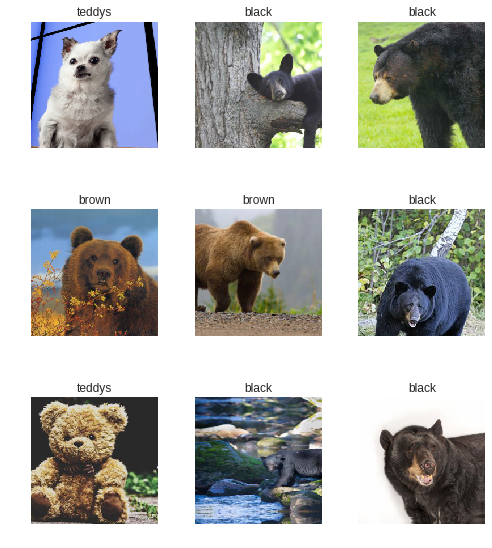

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'brown', 'teddys'], 3, 443, 110)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.154943,0.294145,0.027273,00:10
1,0.670003,0.063958,0.027273,00:09
2,0.458922,0.052288,0.036364,00:09
3,0.357347,0.052380,0.027273,00:09
4,0.283676,0.053434,0.018182,00:09


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


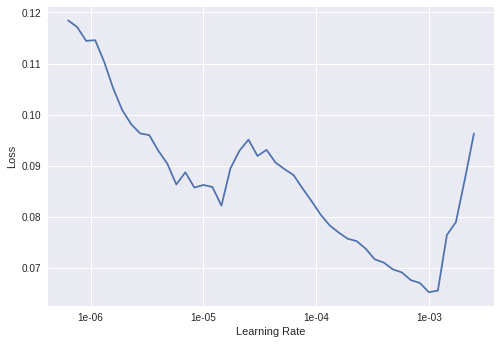

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.095302,0.107394,0.027273,00:08
1,0.077123,0.141810,0.036364,00:09


In [0]:
learn.save('stage-2')

In [19]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (443 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
brown,brown,brown,brown,brown
Path: data/bears;

Valid: LabelList (110 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,brown,teddys,black,brown
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

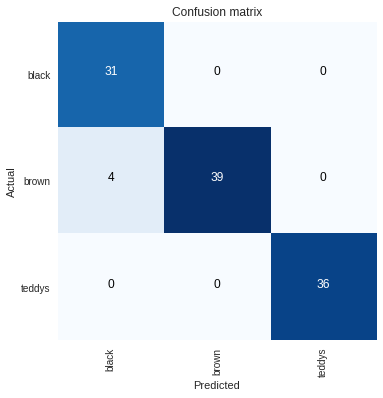

In [21]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

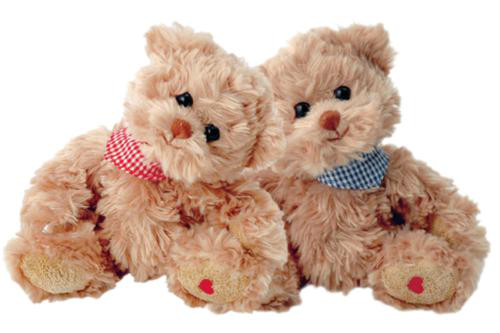

In [30]:
img = open_image(path/'teddys'/'00000011.jpg')
img

In [0]:
learn = load_learner(path)

In [32]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys